In [14]:
import numpy as np
from pricing import EquityForwardCurve, DiscountingCurve, ForwardVariance, Black, Vanilla_PayOff
from montecarlo import MC, MC_Analisys
import lets_be_rational.LetsBeRational as lbr
from scipy import exp, log, sqrt
import matplotlib.pyplot as plt
from closedforms import GM_Basket_closed_form,European_closed_form,vol_basket
from scipy.stats.mstats import gmean
from numpy.linalg import cholesky
import scipy.stats as si  #for gaussian cdf
import time, sys

Generalizzazione a 4 Assets

In [15]:
zero_rate = 1./100
r = np.array([zero_rate,zero_rate,zero_rate,zero_rate])
spot_price = np.array([110,120,97,133])
number_dates = 10
expiry = 10
vol = np.array([20.,30.,25.,32.])/100
corr = np.array(([1,0.15,0.10,0.20],[0.15,1.,-0.05,0.18],[0.1,-0.05,1.,0.13],[0.20,0.18,0.13,1]))
N_equity = len(corr)
ATM = gmean(spot_price)
print("ATM:", ATM)

ATM: 114.23503697769888


In [16]:
dates = np.linspace(0.001,expiry,number_dates)
r_data = np.ones((number_dates,N_equity))*r
d = exp(-r_data.T*dates).T

Forward zero rate:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Forward zero rate:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Forward zero rate:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Forward zero rate:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


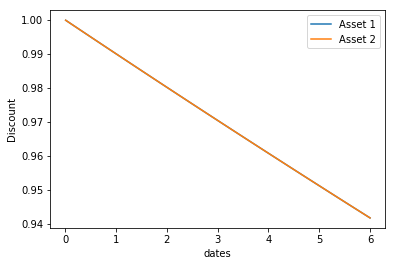

In [17]:
D = []  #list of all discounting curves
for i in range(N_equity):
    D.append(DiscountingCurve(reference=0, discounts=d.T[i], dates=dates))
x = np.linspace(0.006,6,100)
plt.plot(x,D[0](x),label="Asset 1")
plt.plot(x,D[1](x),label="Asset 2")
plt.legend()
plt.xlabel("dates")
plt.ylabel("Discount")
plt.show()

In [18]:
F = []   #list of all equity forward curves
for i in range(N_equity):
    F.append(EquityForwardCurve(reference=0,spot=spot_price[i],discounting_curve=D[i],repo_rates=[0,0],repo_dates=[0,expiry]))

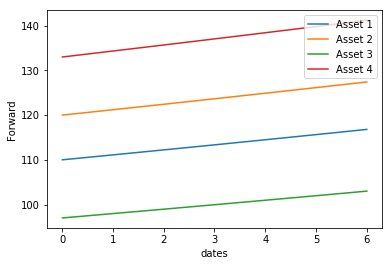

In [19]:
for i in range(len(F)):
    plt.plot(x,F[i](x),label="Asset "+str(i+1))

plt.legend()
plt.xlabel("dates")
plt.ylabel("Forward")
plt.show()

In [20]:
T1 = np.array([0.08,0.17,0.25,0.33,0.42,0.50,1.0,2.0,expiry])
K1 = np.array([spot_price[0],164,172,180])

sigma1 = np.array(([vol[0],vol[0],vol[0],vol[0],vol[0],vol[0],vol[0],vol[0],vol[0]],[32,29.1,28.9,29.3,29.4,29.4,29.6,30.6,30.63],[33.6,29.3,29,29.3,29.3,29.3,29.3,30.6,30.59],[35,29.7,29.4,29.5,29.4,29.3,29.3,30.5,30.46]))
sigma1 = sigma1

T2 = np.array([0.08,0.17,0.25,0.33,0.42,0.50,1.0,2.0,expiry])
K2 = np.array([spot_price[1],164,172,180])
sigma2 = np.array(([vol[1],vol[1],vol[1],vol[1],vol[1],vol[1],vol[1],vol[1],vol[1]],[32,29.1,28.9,29.3,29.4,29.4,29.6,30.6,30.63],[33.6,29.3,29,29.3,29.3,29.3,29.3,30.6,30.59],[35,29.7,29.4,29.5,29.4,29.3,29.3,30.5,30.46]))
sigma2 = sigma2

T3 = np.array([0.08,0.17,0.25,0.33,0.42,0.50,1.0,2.0,expiry])
K3 = np.array([spot_price[2],164,172,180])
sigma3 = np.array(([vol[2],vol[2],vol[2],vol[2],vol[2],vol[2],vol[2],vol[2],vol[2]],[32,29.1,28.9,29.3,29.4,29.4,29.6,30.6,30.63],[33.6,29.3,29,29.3,29.3,29.3,29.3,30.6,30.59],[35,29.7,29.4,29.5,29.4,29.3,29.3,30.5,30.46]))


T4 = np.array([0.08,0.17,0.25,0.33,0.42,0.50,1.0,2.0,expiry])
K4 = np.array([spot_price[3],164,172,180])
sigma4 = np.array(([vol[3],vol[3],vol[3],vol[3],vol[3],vol[3],vol[3],vol[3],vol[3]],[32,29.1,28.9,29.3,29.4,29.4,29.6,30.6,30.63],[33.6,29.3,29,29.3,29.3,29.3,29.3,30.6,30.59],[35,29.7,29.4,29.5,29.4,29.3,29.3,30.5,30.46]))

V = []  #list of variances

V.append(ForwardVariance(reference=0,maturities=T1,strikes=K1,spot_volatility=sigma1,strike_interp=spot_price[0]))
V.append(ForwardVariance(reference=0,maturities=T2,strikes=K2,spot_volatility=sigma2,strike_interp=spot_price[1]))
V.append(ForwardVariance(reference=0,maturities=T3,strikes=K3,spot_volatility=sigma3,strike_interp=spot_price[2]))
V.append(ForwardVariance(reference=0,maturities=T4,strikes=K4,spot_volatility=sigma4,strike_interp=spot_price[3]))

Forward volatility:  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
Forward volatility:  [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
Forward volatility:  [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
Forward volatility:  [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]


In [30]:
model = Black(forward_curve=F, variance=V)
maturities = np.arange(1,31)*0.15

S_t = model.simulate(Nsim=5e5,corr=corr,Ndim = N_equity, seed=10,fixings=maturities)
G_mean = gmean(S_t, axis=2)

Multi Asset Simulation


Preparation of the Basket Forward Curve

In [31]:
S = np.identity(N_equity)*vol
S = np.dot(np.dot(S,corr),S)
F_basket = 1
sigma_basket = vol_basket(vol,corr)
print("Volatility of the basket: ",sigma_basket)
for i in range (N_equity):
    F_basket = F_basket*F[i](maturities)*exp((-0.5*V[i](maturities))*maturities)
    
F_basket = F_basket**(1/N_equity)
F_basket = F_basket*exp(0.5*(sigma_basket**2)*maturities)   #forward curve of the Basket

Volatility of the basket:  0.1573928206748961


In [33]:
time
X_t = G_mean/F_curve
K = ATM
imp_volatility = np.zeros(len(maturities))
imp_volatility_plus =  np.zeros(len(maturities))
imp_volatility_minus =  np.zeros(len(maturities))

kind = 1
for j in range(len(maturities)):
    option = Vanilla_PayOff(St=X_t, strike=K/F_basket,typo=kind)
    result, err_result = MC(option)
    imp_volatility[j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j],1,K/F_basket[j],maturities[j],kind)
    imp_volatility_plus[j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j]+err_result[j],1,K/F_basket[j],maturities[j],kind)
    imp_volatility_minus[j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j]-err_result[j],1,K/F_basket[j],maturities[j],kind)
        

In [34]:
y_lower = np.zeros(len(maturities))
y_upper = np.zeros(len(maturities))
for j in range(len(maturities)):
    if(imp_volatility_minus[j]<imp_volatility_plus[j]):
        y_lower[j] = abs(imp_volatility[j]-imp_volatility_minus[j])
        y_upper[j] = abs(imp_volatility_plus[j]-imp_volatility[j])
    elif(imp_volatility_minus[j]>imp_volatility_plus[j]):
        y_lower[j] = abs(imp_volatility[j]-imp_volatility_plus[j])
        y_upper[j] = abs(imp_volatility_minus[j]-imp_volatility[j])

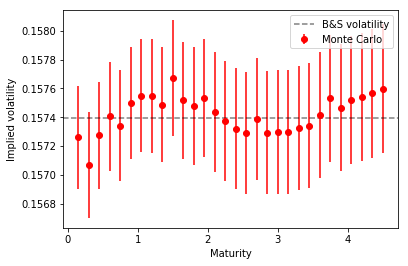

In [35]:
"""Fixed Strike"""  #ATM = 5
c=2
err_lower = 2*y_lower
err_upper = 2*y_upper
plt.errorbar(maturities,imp_volatility,yerr=[err_lower,err_upper],fmt="o",color = "red",label="Monte Carlo")
plt.axhline(y=sigma_basket, color = 'black',alpha = 0.5,linestyle='--',label = 'B&S volatility')
plt.xlabel("Maturity")
plt.ylabel("Implied volatility")
plt.legend()
#plt.savefig("Graphs/implied_vol_logmoney"+str(round(logmoneyness[num[i]],c))+".pdf")
plt.show()